In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

print("NumPy version:",np.__version__)
print("Pandas version:",pd.__version__)

NumPy version: 1.21.5
Pandas version: 1.3.5


In [ ]:
%ls

'High Carbon Steel TensionTest.csv'  'Tension testing Aluminium.csv'
 sample_data/                        'Tension testing Low Carbon Steel.csv'


In [ ]:
HCS = pd.read_csv("/content/High Carbon Steel TensionTest.csv")
LCS = pd.read_csv("/content/Tension testing Low Carbon Steel.csv")
AL = pd.read_csv("/content/Tension testing Aluminium.csv")

In [ ]:
HCS.head()

,Time(s),Force,Tensile strain (Strain 1)%
0,0.000,-0.0002,0.0002
1,1.000,0.0007,0.0001
2,2.000,0.0016,0.0000
3,3.000,0.0070,0.0003
4,3.166,0.1325,0.0014


In [ ]:
LCS.head()

,Time,Force,Tensile strain (Strain 1)
0,0.000,0.0000,0.0003
1,1.000,0.0009,0.0003
2,2.000,0.0017,0.0003
3,3.000,0.0038,0.0001
4,3.453,0.1293,0.0008


In [ ]:
AL.head()

,Time,Force,Tensile strain (Strain 1)
0,0.000,-0.0003,0.0000
1,1.000,0.0006,-0.0003
2,2.000,0.0017,-0.0001
3,3.000,0.0019,-0.0001
4,3.301,0.1275,0.0017


# **stress strain curve**

In [ ]:
Strain_HCS=HCS['Tensile strain (Strain 1)%']
d_steel = 9.93    # test bar diameter = 9.93mm
stress_HCS = (HCS['Force'])/(np.pi*((d_steel/2)**2))

In [ ]:
Strain_LCS=LCS['Tensile strain (Strain 1)']
d_steel = 9.93    # test bar diameter = 9.93mm
stress_LCS = (LCS['Force'])/(np.pi*((d_steel/2)**2))

In [ ]:
Strain_AL=AL['Tensile strain (Strain 1)']
d_steel = 9.93    # test bar diameter = 9.93mm
stress_AL = (AL['Force'])/(np.pi*((d_steel/2)**2))

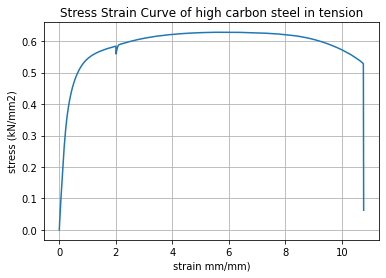

In [ ]:
plt.plot(Strain_HCS,stress_HCS)
plt.xlabel('strain mm/mm)')
plt.ylabel('stress (kN/mm2)')
plt.title('Stress Strain Curve of high carbon steel in tension')
plt.grid()
plt.show()

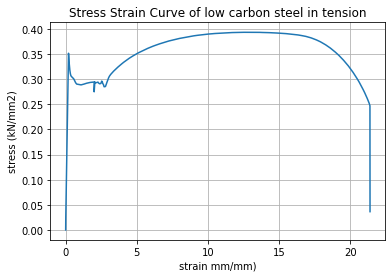

In [ ]:
plt.plot(Strain_LCS,stress_LCS)
plt.xlabel('strain mm/mm)')
plt.ylabel('stress (kN/mm2)')
plt.title('Stress Strain Curve of low carbon steel in tension')
plt.grid()
plt.show()

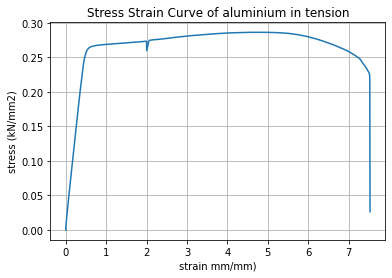

In [ ]:
plt.plot(Strain_AL,stress_AL)
plt.xlabel('strain mm/mm)')
plt.ylabel('stress (kN/mm2)')
plt.title('Stress Strain Curve of aluminium in tension')
plt.grid()
plt.show()

# **calculate ultimate tensile strength**

In [ ]:
# Calculate the tensile strength OF high carbon steel
ts_HCS = np.max(stress_HCS)

print(f'The tensile strength of high carbon steel is: {(ts_HCS)} kN/mm2')

The tensile strength of high carbon steel is: 0.6282272681198146 kN/mm2


In [ ]:
# Calculate the tensile strength of low carbon steel
ts_LCS = np.max(stress_LCS)

print(f'The tensile strength of LOW carbon steel is: {(ts_LCS)} kN/mm2')

The tensile strength of LOW carbon steel is: 0.3935341375625256 kN/mm2


In [ ]:
# Calculate the tensile strength OF aluminium 
ts_AL = np.max(stress_AL)

print(f'The tensile strength of aluminium is: {(ts_AL)} kN/mm2')

The tensile strength of aluminium is: 0.2862438570875749 kN/mm2


# **calculate youngs modulus**

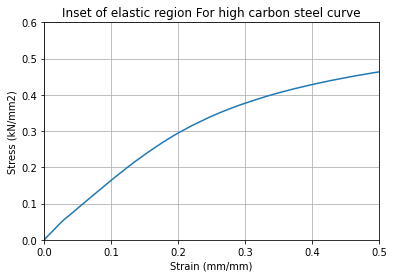

The elastic modulus of HIGH CARBON STEEL is 0.0023757327566104906 kN/mm2


In [ ]:
fig,ax = plt.subplots()
ax.plot(Strain_HCS, stress_HCS)

ax.set_title('Inset of elastic region For high carbon steel curve')
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (kN/mm2)')

ax.set_xlim([0,0.5])
ax.set_ylim([0,0.6])
plt.grid()
plt.show()

# Find the elastic modulus of HIGH CARBON STEEL
# use stress and strain values from stress=0 to stress=0.0005 kN
linear_stress_HCS_mask = stress_HCS < 0.4
linear_stress_HCS = stress_HCS[linear_stress_HCS_mask]
linear_strain_HCS = Strain_HCS[linear_stress_HCS_mask]

linear_regression_HCS = linregress(linear_strain_HCS, linear_stress_HCS)
linear_regression_HCS
E_HCS = linear_regression_HCS[0]

print(f'The elastic modulus of HIGH CARBON STEEL is {(E_HCS)} kN/mm2')

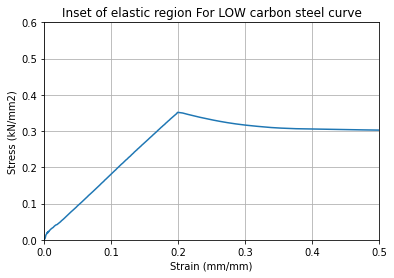

The elastic modulus of HIGH CARBON STEEL is 0.004614790149249287 kN/mm2


In [ ]:
fig,ax = plt.subplots()
ax.plot(Strain_LCS, stress_LCS)

ax.set_title('Inset of elastic region For LOW carbon steel curve')
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (kN/mm2)')

ax.set_xlim([0,0.5])
ax.set_ylim([0,0.6])
plt.grid()
plt.show()

# Find the elastic modulus of LOW CARBON STEEL
# use stress and strain values from stress=0 to stress=0.0005 kN
linear_stress_LCS_mask = stress_LCS < 0.4
linear_stress_LCS = stress_LCS[linear_stress_LCS_mask]
linear_strain_LCS = Strain_LCS[linear_stress_LCS_mask]

linear_regression_LCS = linregress(linear_strain_LCS, linear_stress_LCS)
linear_regression_LCS
E_LCS = linear_regression_LCS[0]

print(f'The elastic modulus of LOW CARBON STEEL is {(E_LCS)} kN/mm2')

In [ ]:
fig,ax = plt.subplots()
ax.plot(Strain_AL, stress_AL)

ax.set_title('Inset of elastic region For AL curve')
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (kN/mm2)')

ax.set_xlim([0,0.5])
ax.set_ylim([0,0.6])
plt.grid()
plt.show()

# Find the elastic modulus of LOW CARBON STEEL
# use stress and strain values from stress=0 to stress=0.0005 kN
linear_stress_AL_mask = stress_AL < 0.4
linear_stress_AL = stress_AL[linear_stress_AL_mask]
linear_strain_AL = Strain_AL[linear_stress_AL_mask]

linear_regression_AL= linregress(linear_strain_AL, linear_stress_AL)
linear_regression_AL
E_AL = linear_regression_AL[0]

print(f'The elastic modulus of AL  is {(E_AL)} kN/mm2')

NameError: ignored

# **Yield strength**

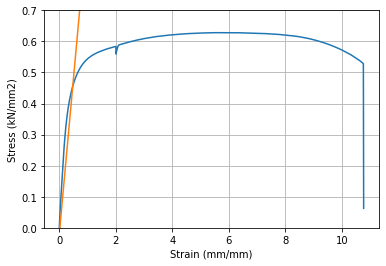

In [ ]:
# calculate the yield strength 
strain_HCS_array = np.array(Strain_HCS)
Strain_HCS_off=E_HCS*100*linear_strain_HCS+0.02
stress_HCS_off=E_HCS*100*linear_strain_HCS
fig, ax = plt.subplots()
#ax.plot(Strain_HCS,stress_HCS,Strain_HCS,stress_offset_al)
ax.plot(Strain_HCS,stress_HCS)
ax.plot(Strain_HCS_off,stress_HCS_off)
#ax.set_xlim([0,0.5])
ax.set_ylim([0,0.7])
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (kN/mm2)')
plt.savefig('20% offset method.png', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [ ]:
ys_HCS=0.45 
print(f'The yield strength of high carbon steel is {(ys_HCS)} kN/mm2')

The yield strength of high carbon steel is 0.45 kN/mm2


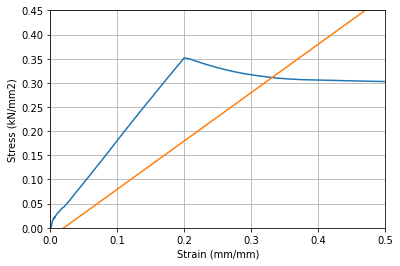

In [ ]:
# calculate the yield strength 
strain_LCS_array = np.array(Strain_LCS)
Strain_LCS_off=E_LCS*100*linear_strain_LCS+0.02
stress_LCS_off=E_LCS*100*linear_strain_LCS
fig, ax = plt.subplots()
#ax.plot(Strain_HCS,stress_HCS,Strain_HCS,stress_offset_al)
ax.plot(Strain_LCS,stress_LCS)
ax.plot(Strain_LCS_off,stress_LCS_off)
ax.set_xlim([0,0.5])
ax.set_ylim([0,0.45])
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (kN/mm2)')
plt.savefig('20% offset method.png', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [ ]:
ys_LCS=0.32 
print(f'The yield strength of high carbon steel is {(ys_LCS)} kN/mm2')

The yield strength of high carbon steel is 0.32 kN/mm2


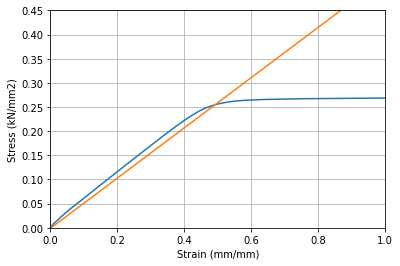

In [ ]:
# calculate the yield strength 
strain_AL_array = np.array(Strain_AL)
stress_offset_AL = 0.52*(strain_AL_array - 0.002)
Strain_AL_off=E_AL*100*linear_strain_AL+0.02
stress_AL_off=E_AL*100*linear_strain_AL+0.002
fig, ax = plt.subplots()
ax.plot(Strain_AL,stress_AL,Strain_AL,stress_offset_AL)
#ax.plot(Strain_AL,stress_AL)
#ax.plot(Strain_AL_off,stress_AL_off)
ax.set_xlim([0,1])
ax.set_ylim([0,0.45])
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (kN/mm2)')
plt.savefig('20% offset method.png', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [ ]:
ys_AL=0.26 
print(f'The yield strength of aluminium is {(ys_AL)} kN/mm2')

The yield strength of high carbon steel is 0.26 kN/mm2


# **Failure strength**

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


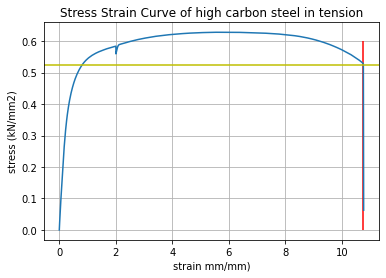

In [ ]:
plt.plot(Strain_HCS,stress_HCS)
plt.xlabel('strain mm/mm)')
plt.ylabel('stress (kN/mm2)')
plt.title('Stress Strain Curve of high carbon steel in tension')
plt.axhline(y=0.525, color='Y', linestyle='-')
plt.vlines(10.75, 0, 0.6, color='red')
plt.grid()
plt.show()


In [ ]:
HCS_STRESS=0.53
HCS_STRAIN=10.75
print(f'The failure strength of high carbon steel is {(HCS_STRESS)} kN/mm2')
print(f'The failure STRAIN of high carbon steel is {(HCS_STRAIN)} mm/mm')

The failure strength of high carbon steel is 0.53 kN/mm2
The failure STRAIN of high carbon steel is 10.75 mm/mm


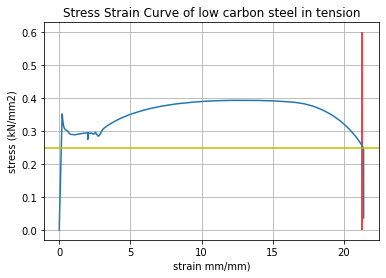

In [ ]:
plt.plot(Strain_LCS,stress_LCS)
plt.xlabel('strain mm/mm)')
plt.ylabel('stress (kN/mm2)')
plt.title('Stress Strain Curve of low carbon steel in tension')
plt.axhline(y=0.25, color='Y', linestyle='-')
plt.vlines(21.25, 0, 0.6, color='red')
plt.grid()
plt.show()

In [ ]:
LCS_STRESS=0.25
LCS_STRAIN=21.25
print(f'The failure strength of high carbon steel is {(LCS_STRESS)} kN/mm2')
print(f'The failure STRAIN of high carbon steel is {(LCS_STRAIN)} mm/mm')

The failure strength of high carbon steel is 0.25 kN/mm2
The failure STRAIN of high carbon steel is 21.25 mm/mm


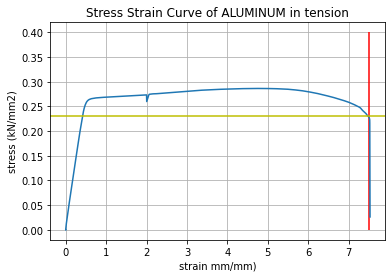

In [ ]:
plt.plot(Strain_AL,stress_AL)
plt.xlabel('strain mm/mm)')
plt.ylabel('stress (kN/mm2)')
plt.title('Stress Strain Curve of ALUMINUM in tension')
plt.axhline(y=0.23, color='Y', linestyle='-')
plt.vlines(7.5, 0, 0.4, color='red')
plt.grid()
plt.show()

In [ ]:
AL_STRESS=0.23
AL_STRAIN=7.5
print(f'The failure strength of high carbon steel is {(AL_STRESS)} kN/mm2')
print(f'The failure STRAIN of high carbon steel is {(AL_STRAIN)} mm/mm')

The failure strength of high carbon steel is 0.23 kN/mm2
The failure STRAIN of high carbon steel is 7.5 mm/mm


# **Torsional testing**

In [ ]:
torsion_hcs = pd.read_excel("/content/torsion_high carbon.xlsx")


In [ ]:
torsion_hcs.head()

,displacement -degree,angle-radian,Torque-Nm
0,0.00,0.000000,0.00
1,19.38,0.338245,8.53
2,22.38,0.390605,9.44
3,25.47,0.444535,10.67
4,28.43,0.496197,10.67


# **shear stress**

In [ ]:
dia=0.00594    #bar diameter
rad=dia/2
L=0.07585 # guage length
j=(np.pi*((dia/2)**4))/2 #polar moment of inertia
shear_stress=(torsion_hcs['Torque-Nm']* rad)/(j)


# **shear strain**

In [ ]:
shear_strain=(torsion_hcs['angle-radian']* rad)/L

# **Modulus of ridigity**

In [ ]:
G=shear_stress/shear_strain


0              NaN
1     1.565049e+10
2     1.499838e+10
3     1.489594e+10
4     1.334505e+10
5     1.168883e+10
6     1.088286e+10
7     1.065979e+10
8     9.627112e+09
9     8.928678e+09
10    8.009832e+09
11    5.089985e+09
12    0.000000e+00
dtype: float64

In [ ]:
G_HCS=1.4E9/10E6
print("Modulus of rigidity is =", G_HCS,"MPa")

Modulus of rigidity is = 140.0 MPa


# **Toughness**

In [ ]:
from numpy import trapz
area = trapz(shear_stress)
area=area/10e6
print("Toughness (MPa)=", area)

Toughness (MPa)= 303.70454785166953


# **shear stress and strain curve**

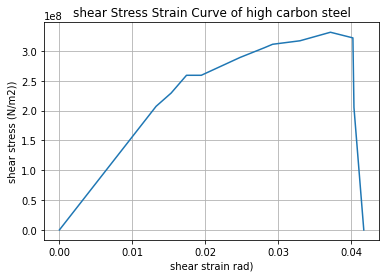

In [ ]:
lt.plot(shear_strain,shear_stress)
plt.xlabel('shear strain rad)')
plt.ylabel('shear stress (N/m2))')
plt.title('shear Stress Strain Curve of high carbon steel')
plt.grid()
plt.show()

# **charpy impact test under room temperature**

In [ ]:
alpha=99
beta=86
PLE=0.53
r= 0.30 # length of hammer m
m=0.5 # mass of hammer in kg

In [ ]:
from math import sin
absorbed=m*9.8*r*(sin(alpha-90)-sin(beta-90))
print ("Energy absorded =",abs(absorbed))

Energy absorded = 0.5066854947972722


# **charpy impact test under lower temperature**

In [ ]:
from math import sin
beta2=81
absorbed2=m*9.8*r*(sin(alpha-90)-sin(beta2-90))

print ("Energy absorded =",abs(absorbed2))

Energy absorded = 1.2116283466107645


# **charpy impact test low carbon steel**

In [ ]:
from math import sin
beta3=67
absorbed3=m*9.8*r*(sin(alpha-90)-sin(beta3-90))

print ("Energy absorded =",abs(absorbed3))

Energy absorded = 0.6381298208321187
